## Random Forest

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Time series jason brownlee.xlsx')
df.set_index('Timestamp',inplace=True)
df = df.rename(columns={'BAIRRO ALTO -  / FREQ B1': 'FREQUENCIA BOMBA 1', 'BAIRRO ALTO -  / FREQ B2': 'FREQUENCIA BOMBA 2','BAIRRO ALTO -  / FREQ B3':'FREQUENCIA BOMBA 3','BAIRRO ALTO - LT01 / NÍVEL':'NIVEL DO RESERVATÓRIO - LT01','BAIRRO ALTO - FT01 / ENT IRAI':'VAZÃO DE ENTRADA- FT01','BAIRRO ALTO - FT02 / GBAL':'VAZÃO DE GRAVIDADE - FT02','BAIRRO ALTO - FT03 / RBAL':'VAZÃO DE RECALQUE - FT03','BAIRRO ALTO - PT01 / SUCÇÃO':'PRESSÃO DE SUCÇÃO - PT01','BAIRRO ALTO - PT02 / RBAL':'PRESSÃO DE RECALQUE - PT02'})
df.replace(to_replace='Bad', value=np.nan, inplace=True)
df.interpolate(inplace=True)
df = df.resample('1H').mean().reset_index()

In [3]:
df.set_index('Timestamp',inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02
Timestamp,,,,,,,,,
2018-01-01 00:00:00,39.716118,0.0,0.0,4.027903,270.285187,76.920532,61.992577,5.232423,13.961227
2018-01-01 01:00:00,40.692509,0.0,0.0,4.241524,268.635803,83.023201,66.538521,5.431031,13.961227
2018-01-01 02:00:00,34.512108,0.0,0.0,4.352295,0.000000,82.351860,57.269573,5.555567,11.049756
2018-01-01 03:00:00,33.531471,0.0,0.0,4.136808,0.000000,69.360985,52.244926,5.358496,11.115347
2018-01-01 04:00:00,33.191261,0.0,0.0,3.947308,0.000000,59.742775,49.718590,5.184939,11.180938


In [4]:
# definindo 1 passo à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead1 = 1
lags = 3

In [5]:
colunas = df.columns

for lag in range(1, lags):
    for column in colunas:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [6]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead1)
df.dropna(axis=0, inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2,FREQUENCIA BOMBA 2_t-2,FREQUENCIA BOMBA 3_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2,VAZÃO DE ENTRADA- FT01_t-2,VAZÃO DE GRAVIDADE - FT02_t-2,VAZÃO DE RECALQUE - FT03_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2,PRESSÃO DE RECALQUE - PT02_t-2,y
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 02:00:00,34.512108,0.0,0.0,4.352295,0.000000,82.351860,57.269573,5.555567,11.049756,40.692509,...,39.716118,0.0,0.0,4.027903,270.285187,76.920532,61.992577,5.232423,13.961227,4.136808
2018-01-01 03:00:00,33.531471,0.0,0.0,4.136808,0.000000,69.360985,52.244926,5.358496,11.115347,34.512108,...,40.692509,0.0,0.0,4.241524,268.635803,83.023201,66.538521,5.431031,13.961227,3.947308
2018-01-01 04:00:00,33.191261,0.0,0.0,3.947308,0.000000,59.742775,49.718590,5.184939,11.180938,33.531471,...,34.512108,0.0,0.0,4.352295,0.000000,82.351860,57.269573,5.555567,11.049756,3.832984
2018-01-01 05:00:00,34.850670,0.0,0.0,3.832984,283.889404,54.762260,49.945602,5.073123,12.047937,33.191261,...,33.531471,0.0,0.0,4.136808,0.000000,69.360985,52.244926,5.358496,11.115347,4.128683
2018-01-01 06:00:00,34.174210,0.0,0.0,4.128683,284.199951,55.226677,48.235146,5.375868,12.206452,34.850670,...,33.191261,0.0,0.0,3.947308,0.000000,59.742775,49.718590,5.184939,11.180938,4.389738


In [7]:
df_train = df.iloc[:-test_size, :]
df_test = df.iloc[-test_size:, :]

In [8]:
X_train = df_train.drop(['y'], axis=1)
y_train = df_train['y']
X_test = df_test.drop(['y'], axis=1)
y_test = df_test['y']

In [9]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [10]:
model=RandomForestRegressor(n_estimators=30, min_samples_leaf=1, random_state=0, n_jobs=-1)

In [11]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=0)

In [12]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

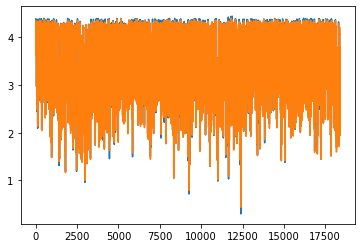

In [13]:
import matplotlib.pyplot as plt
plt.plot(y_train.values, label='y_train')
plt.plot(y_hat_train, label='y_hat_train')

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score

In [15]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train=np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test=np.sqrt(mean_squared_error(y_test, y_hat_test))
mae_train=mean_absolute_error(y_train, y_hat_train)
mae_test=mean_absolute_error(y_test, y_hat_test)
mape_train = int((np.mean(np.abs((y_train - y_hat_train) / y_train)) * 100))
mape_test = int((np.mean(np.abs((y_test - y_hat_test) / y_test)) * 100))
r2_train = r2_score(y_train, y_hat_train)
r2_test = r2_score(y_test, y_hat_test)

In [16]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train, mse_test))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train, mape_test))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train, mae_test))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train, rmse_test))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train, r2_test))

MSE train: 0.001, MSE test: 0.019
MAPE train: 0.000, MAPE test: 2.000
MAE train: 0.017, MAE test: 0.078
RMSE train: 0.029, RMSE test: 0.138
R2 train: 0.998, R2 test: 0.956


In [17]:
## 12 passos à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead7 = 12
lags = 3

In [18]:
colunas7 = df.columns

for lag in range(1, lags):
    for column in colunas7:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [19]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead7)
df.dropna(axis=0, inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2_t-2,FREQUENCIA BOMBA 2_t-2_t-2,FREQUENCIA BOMBA 3_t-2_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2_t-2,VAZÃO DE ENTRADA- FT01_t-2_t-2,VAZÃO DE GRAVIDADE - FT02_t-2_t-2,VAZÃO DE RECALQUE - FT03_t-2_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2_t-2,PRESSÃO DE RECALQUE - PT02_t-2_t-2,y_t-2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 06:00:00,34.174210,0.0,0.0,4.128683,284.199951,55.226677,48.235146,5.375868,12.206452,34.850670,...,34.512108,0.0,0.0,4.352295,0.000000,82.351860,57.269573,5.555567,11.049756,3.832984
2018-01-01 07:00:00,35.942287,0.0,0.0,4.389738,0.000000,55.884785,51.996529,5.577349,12.991898,34.174210,...,33.531471,0.0,0.0,4.136808,0.000000,69.360985,52.244926,5.358496,11.115347,4.128683
2018-01-01 08:00:00,43.891830,0.0,0.0,4.198495,0.000000,59.514992,64.828224,5.354414,16.956018,35.942287,...,33.191261,0.0,0.0,3.947308,0.000000,59.742775,49.718590,5.184939,11.180938,4.389738
2018-01-01 09:00:00,48.734074,0.0,0.0,4.013699,291.549774,75.489296,77.221199,5.183626,19.082754,43.891830,...,34.850670,0.0,0.0,3.832984,283.889404,54.762260,49.945602,5.073123,12.047937,4.198495
2018-01-01 10:00:00,51.120010,0.0,0.0,4.207844,291.679474,102.019135,88.984375,5.299061,18.931648,48.734074,...,34.174210,0.0,0.0,4.128683,284.199951,55.226677,48.235146,5.375868,12.206452,4.013699


In [20]:
df_train7 = df.iloc[:-test_size, :]
df_test7 = df.iloc[-test_size:, :]

In [21]:
X_train7 = df_train7.drop(['y'], axis=1)
y_train7 = df_train7['y']
X_test7 = df_test7.drop(['y'], axis=1)
y_test7 = df_test7['y']

In [22]:
model7=RandomForestRegressor(n_estimators=30, min_samples_leaf=1, random_state=0, n_jobs=-1)

In [23]:
model7.fit(X_train7, y_train7)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=0)

In [24]:
y_hat_train7 = model7.predict(X_train7)
y_hat_test7 = model7.predict(X_test7)

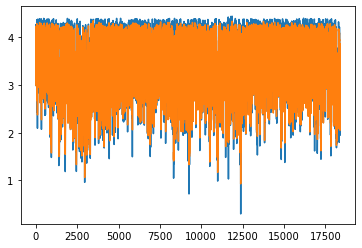

In [25]:
import matplotlib.pyplot as plt
plt.plot(y_train7.values, label='y_train')
plt.plot(y_hat_train7, label='y_hat_train')

In [26]:
mse_train7 = mean_squared_error(y_train7, y_hat_train7)
mse_test7 = mean_squared_error(y_test7, y_hat_test7)
rmse_train7=np.sqrt(mean_squared_error(y_train7, y_hat_train7))
rmse_test7=np.sqrt(mean_squared_error(y_test7, y_hat_test7))
mae_train7=mean_absolute_error(y_train7, y_hat_train7)
mae_test7=mean_absolute_error(y_test7, y_hat_test7)
mape_train7 = int((np.mean(np.abs((y_train7 - y_hat_train7) / y_train7)) * 100))
mape_test7 = int((np.mean(np.abs((y_test7 - y_hat_test7) / y_test7)) * 100))
r2_train7 = r2_score(y_train7, y_hat_train7)
r2_test7 = r2_score(y_test7, y_hat_test7)

In [27]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train7, mse_test7))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train7, mape_test7))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train7, mae_test7))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train7, rmse_test7))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train7, r2_test7))

MSE train: 0.021, MSE test: 0.645
MAPE train: 3.000, MAPE test: 17.000
MAE train: 0.101, MAE test: 0.619
RMSE train: 0.143, RMSE test: 0.803
R2 train: 0.954, R2 test: -0.484


In [28]:
# 24 passos à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead14 = 24
lags = 3

In [29]:
colunas14 = df.columns

for lag in range(1, lags):
    for column in colunas14:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [30]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead14)
df.dropna(axis=0, inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2_t-2_t-2,FREQUENCIA BOMBA 2_t-2_t-2_t-2,FREQUENCIA BOMBA 3_t-2_t-2_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2_t-2_t-2,VAZÃO DE ENTRADA- FT01_t-2_t-2_t-2,VAZÃO DE GRAVIDADE - FT02_t-2_t-2_t-2,VAZÃO DE RECALQUE - FT03_t-2_t-2_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2_t-2_t-2,PRESSÃO DE RECALQUE - PT02_t-2_t-2_t-2,y_t-2_t-2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 12:00:00,51.996922,0.000000,0.0,4.378140,0.000000,147.215225,99.479164,5.293007,16.970486,50.419205,...,34.174210,0.0,0.0,4.128683,284.199951,55.226677,48.235146,5.375868,12.206452,3.917960
2018-01-01 13:00:00,57.988792,21.987036,0.0,3.997223,288.392853,131.411713,108.912041,4.862528,20.949074,51.996922,...,35.942287,0.0,0.0,4.389738,0.000000,55.884785,51.996529,5.577349,12.991898,4.035455
2018-01-01 14:00:00,58.435562,0.000000,0.0,4.070675,283.143951,123.302452,106.298676,5.070752,21.987303,57.988792,...,43.891830,0.0,0.0,4.198495,0.000000,59.514992,64.828224,5.354414,16.956018,4.060713
2018-01-01 15:00:00,57.271839,0.000000,0.0,4.166386,274.760162,118.042953,102.010719,5.193643,22.004305,58.435562,...,48.734074,0.0,0.0,4.013699,291.549774,75.489296,77.221199,5.183626,19.082754,3.742448
2018-01-01 16:00:00,46.214523,0.000000,0.0,4.265089,275.261566,119.989746,81.174637,5.363875,15.986690,57.271839,...,51.120010,0.0,0.0,4.207844,291.679474,102.019135,88.984375,5.299061,18.931648,3.682262


In [31]:
df_train14 = df.iloc[:-test_size, :]
df_test14 = df.iloc[-test_size:, :]

In [32]:
X_train14 = df_train14.drop(['y'], axis=1)
y_train14 = df_train14['y']
X_test14 = df_test14.drop(['y'], axis=1)
y_test14 = df_test14['y']

In [33]:
model14=RandomForestRegressor(n_estimators=30, min_samples_leaf=1, random_state=0, n_jobs=-1)

In [34]:
model14.fit(X_train14, y_train14)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=0)

In [35]:
y_hat_train14 = model14.predict(X_train14)
y_hat_test14 = model14.predict(X_test14)

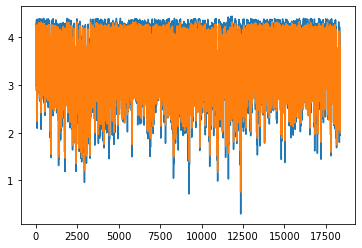

In [36]:
import matplotlib.pyplot as plt
plt.plot(y_train14.values, label='y_train')
plt.plot(y_hat_train14, label='y_hat_train')

In [37]:
mse_train14 = mean_squared_error(y_train14, y_hat_train14)
mse_test14 = mean_squared_error(y_test14, y_hat_test14)
rmse_train14=np.sqrt(mean_squared_error(y_train14, y_hat_train14))
rmse_test14=np.sqrt(mean_squared_error(y_test14, y_hat_test14))
mae_train14=mean_absolute_error(y_train14, y_hat_train14)
mae_test14=mean_absolute_error(y_test14, y_hat_test14)
mape_train14 = int((np.mean(np.abs((y_train14 - y_hat_train14) / y_train14)) * 100))
mape_test14 = int((np.mean(np.abs((y_test14 - y_hat_test14) / y_test14)) * 100))
r2_train14 = r2_score(y_train14, y_hat_train14)
r2_test14 = r2_score(y_test14, y_hat_test14)

In [38]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train14, mse_test14))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train14, mape_test14))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train14, mae_test14))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train14, rmse_test14))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train14, r2_test14))

MSE train: 0.021, MSE test: 0.375
MAPE train: 3.000, MAPE test: 14.000
MAE train: 0.104, MAE test: 0.470
RMSE train: 0.146, RMSE test: 0.613
R2 train: 0.952, R2 test: 0.139


In [39]:
## 48 passos à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead30 = 48
lags = 3

In [40]:
colunas30 = df.columns

for lag in range(1, lags):
    for column in colunas30:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [41]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead30)
df.dropna(axis=0, inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2_t-2_t-2_t-2,FREQUENCIA BOMBA 2_t-2_t-2_t-2_t-2,FREQUENCIA BOMBA 3_t-2_t-2_t-2_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2_t-2_t-2_t-2,VAZÃO DE ENTRADA- FT01_t-2_t-2_t-2_t-2,VAZÃO DE GRAVIDADE - FT02_t-2_t-2_t-2_t-2,VAZÃO DE RECALQUE - FT03_t-2_t-2_t-2_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2_t-2_t-2_t-2,PRESSÃO DE RECALQUE - PT02_t-2_t-2_t-2_t-2,y_t-2_t-2_t-2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 20:00:00,51.284271,0.0,0.0,3.917960,279.348541,109.422928,91.448112,5.001904,17.925348,52.154751,...,51.996922,0.000000,0.0,4.378140,0.000000,147.215225,99.479164,5.293007,16.970486,4.235716
2018-01-01 21:00:00,50.209923,0.0,0.0,4.035455,276.239441,116.948288,91.837364,5.116417,17.015503,51.284271,...,57.988792,21.987036,0.0,3.997223,288.392853,131.411713,108.912041,4.862528,20.949074,4.242189
2018-01-01 22:00:00,49.518959,0.0,0.0,4.060713,0.000000,107.034767,88.814095,5.116480,16.956018,50.209923,...,58.435562,0.000000,0.0,4.070675,283.143951,123.302452,106.298676,5.070752,21.987303,4.264114
2018-01-01 23:00:00,43.746536,0.0,0.0,3.742448,0.000000,101.296143,77.686005,4.858366,13.985035,49.518959,...,57.271839,0.000000,0.0,4.166386,274.760162,118.042953,102.010719,5.193643,22.004305,4.007146
2018-01-02 00:00:00,41.581829,0.0,0.0,3.682262,282.199066,84.831284,68.322098,4.861396,13.932292,43.746536,...,46.214523,0.000000,0.0,4.265089,275.261566,119.989746,81.174637,5.363875,15.986690,4.082773


In [42]:
df_train30 = df.iloc[:-test_size, :]
df_test30 = df.iloc[-test_size:, :]

In [43]:
X_train30 = df_train30.drop(['y'], axis=1)
y_train30 = df_train30['y']
X_test30 = df_test30.drop(['y'], axis=1)
y_test30 = df_test30['y']

In [44]:
model30=RandomForestRegressor(n_estimators=30, min_samples_leaf=1, random_state=0, n_jobs=-1)

In [45]:
model30.fit(X_train30, y_train30)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=0)

In [46]:
y_hat_train30 = model30.predict(X_train30)
y_hat_test30 = model30.predict(X_test30)

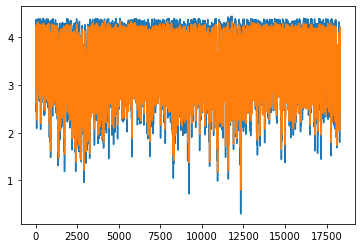

In [47]:
import matplotlib.pyplot as plt
plt.plot(y_train30.values, label='y_train')
plt.plot(y_hat_train30, label='y_hat_train')

In [48]:
mse_train30 = mean_squared_error(y_train30, y_hat_train30)
mse_test30 = mean_squared_error(y_test30, y_hat_test30)
rmse_train30=np.sqrt(mean_squared_error(y_train30, y_hat_train30))
rmse_test30=np.sqrt(mean_squared_error(y_test30, y_hat_test30))
mae_train30=mean_absolute_error(y_train30, y_hat_train30)
mae_test30=mean_absolute_error(y_test30, y_hat_test30)
mape_train30 = int((np.mean(np.abs((y_train30 - y_hat_train30) / y_train30)) * 100))
mape_test30 = int((np.mean(np.abs((y_test30- y_hat_test30) / y_test30)) * 100))
r2_train30 = r2_score(y_train30, y_hat_train30)
r2_test30 = r2_score(y_test30, y_hat_test30)

In [49]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train30, mse_test30))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train30, mape_test30))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train30, mae_test30))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train30, rmse_test30))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train30, r2_test30))

MSE train: 0.027, MSE test: 0.451
MAPE train: 3.000, MAPE test: 16.000
MAE train: 0.118, MAE test: 0.530
RMSE train: 0.163, RMSE test: 0.672
R2 train: 0.940, R2 test: -0.032


In [50]:
df_train.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2,FREQUENCIA BOMBA 2_t-2,FREQUENCIA BOMBA 3_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2,VAZÃO DE ENTRADA- FT01_t-2,VAZÃO DE GRAVIDADE - FT02_t-2,VAZÃO DE RECALQUE - FT03_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2,PRESSÃO DE RECALQUE - PT02_t-2,y
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 02:00:00,34.512108,0.0,0.0,4.352295,0.000000,82.351860,57.269573,5.555567,11.049756,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.070675
2018-01-01 03:00:00,33.531471,0.0,0.0,4.136808,0.000000,69.360985,52.244926,5.358496,11.115347,34.512108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.166386
2018-01-01 04:00:00,33.191261,0.0,0.0,3.947308,0.000000,59.742775,49.718590,5.184939,11.180938,33.531471,...,34.512108,0.0,0.0,4.352295,0.0,82.351860,57.269573,5.555567,11.049756,4.265089
2018-01-01 05:00:00,34.850670,0.0,0.0,3.832984,283.889404,54.762260,49.945602,5.073123,12.047937,33.191261,...,33.531471,0.0,0.0,4.136808,0.0,69.360985,52.244926,5.358496,11.115347,4.076128
2018-01-01 06:00:00,34.174210,0.0,0.0,4.128683,284.199951,55.226677,48.235146,5.375868,12.206452,34.850670,...,33.191261,0.0,0.0,3.947308,0.0,59.742775,49.718590,5.184939,11.180938,3.746744


In [51]:
df_train7.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2_t-2,FREQUENCIA BOMBA 2_t-2_t-2,FREQUENCIA BOMBA 3_t-2_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2_t-2,VAZÃO DE ENTRADA- FT01_t-2_t-2,VAZÃO DE GRAVIDADE - FT02_t-2_t-2,VAZÃO DE RECALQUE - FT03_t-2_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2_t-2,PRESSÃO DE RECALQUE - PT02_t-2_t-2,y_t-2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 06:00:00,34.174210,0.0,0.0,4.128683,284.199951,55.226677,48.235146,5.375868,12.206452,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 07:00:00,35.942287,0.0,0.0,4.389738,0.000000,55.884785,51.996529,5.577349,12.991898,34.174210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 08:00:00,43.891830,0.0,0.0,4.198495,0.000000,59.514992,64.828224,5.354414,16.956018,35.942287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.746744
2018-01-01 09:00:00,48.734074,0.0,0.0,4.013699,291.549774,75.489296,77.221199,5.183626,19.082754,43.891830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.797072
2018-01-01 10:00:00,51.120010,0.0,0.0,4.207844,291.679474,102.019135,88.984375,5.299061,18.931648,48.734074,...,34.17421,0.0,0.0,4.128683,284.199951,55.226677,48.235146,5.375868,12.206452,3.917960


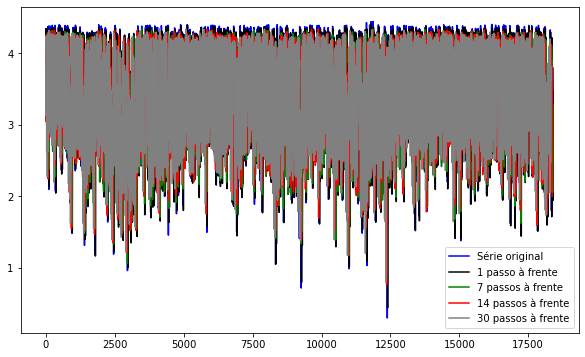

In [52]:
## Gráfico comparando o horizonte de previsão no X-gboost

plt.figure(figsize=(10,6))
plt.plot(y_train.values, label='y_train', color='blue')
plt.plot(y_hat_train, label='y_hat_train',color='black')
plt.plot(y_hat_train7, label='y_hat_train', color='green')
plt.plot(y_hat_train14, label='y_hat_train',color='red')
plt.plot(y_hat_train30, label='y_hat_train',color='grey')
plt.legend(['Série original','1 passo à frente','7 passos à frente','14 passos à frente','30 passos à frente'])

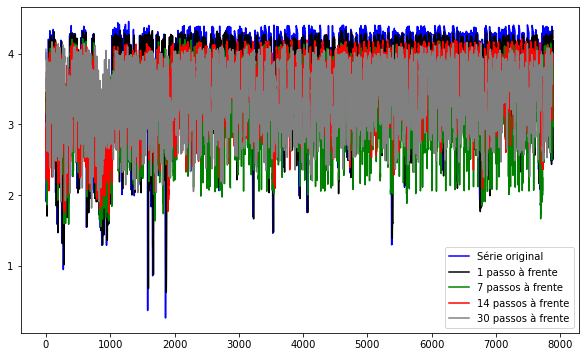

In [53]:
## Gráfico comparando o horizonte de previsão no X-gboost

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='y_train', color='blue')
plt.plot(y_hat_test, label='y_hat_train',color='black')
plt.plot(y_hat_test7, label='y_hat_train', color='green')
plt.plot(y_hat_test14, label='y_hat_train',color='red')
plt.plot(y_hat_test30, label='y_hat_train',color='grey')
plt.legend(['Série original','1 passo à frente','7 passos à frente','14 passos à frente','30 passos à frente'])